## Question 1

In [38]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

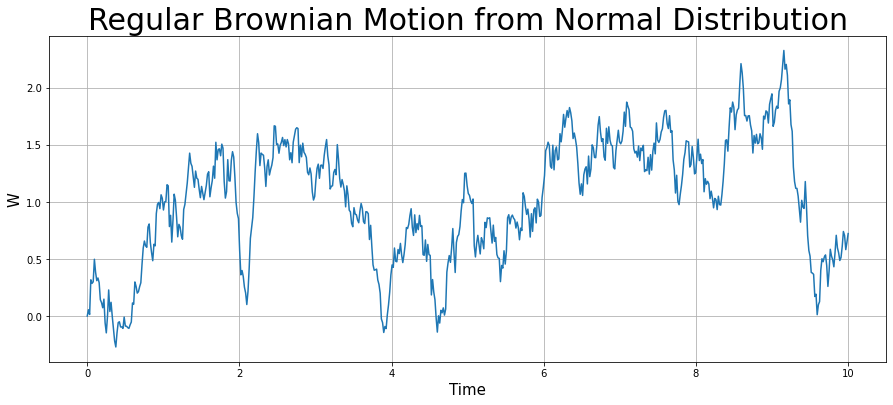

In [39]:
def brownian(s,t,n):
    np.random.seed(s)
    y = np.random.normal(loc=0, scale=1, size=t*n)/math.sqrt(n)
    x = np.linspace(0,t,num=t*n)
    w = np.zeros(t*n)
    for i in range(t*n-1):
        w[i+1] = y[i]
    for i in range(t*n-1):
        w[i+1] = w[i+1]+w[i]
    return x,w
def plotB(x,w):
    plt.figure(figsize=(15, 6))
    plt.plot(x,w)
    plt.title('Regular Brownian Motion from Normal Distribution', fontsize=30)
    plt.ylabel('W', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()
x,w = brownian(5,10,64)
plotB(x,w)

## Question 2

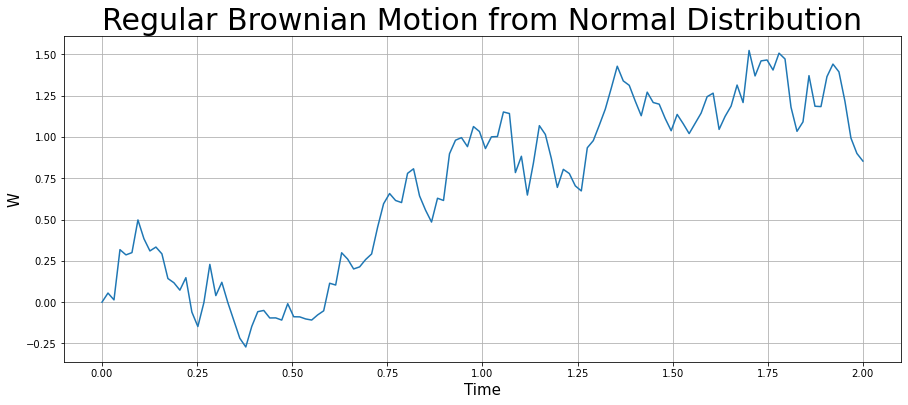

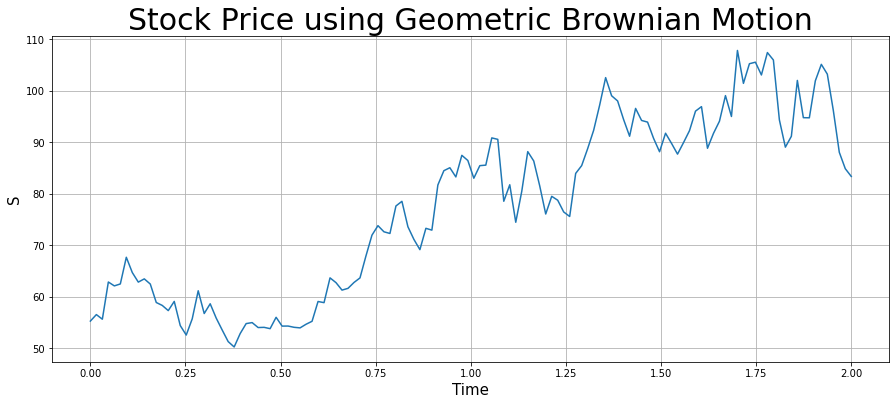

In [40]:
def geoBrownStock(s0,mu,sigma,t,n,seed):
    s = np.zeros(t*n)
    #print(s)
    x,w = brownian(seed,t,n)
    plotB(x,w)
    for i in range(t*n):
        s[i] = s0*pow( np.e, ((mu-sigma*sigma/2)*(i/(n*t)) + (sigma*w[i]) ) )
    #print(s[s.size-1])
    plt.figure(figsize=(15, 6))
    plt.plot(x,s)
    plt.title('Stock Price using Geometric Brownian Motion', fontsize=30)
    plt.ylabel('S', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()
geoBrownStock(55.25,0.15,0.4,2,64,5)

## Question 3

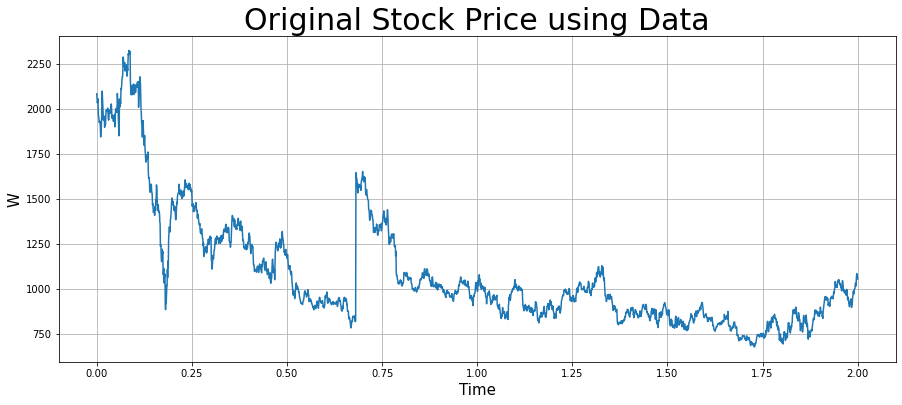

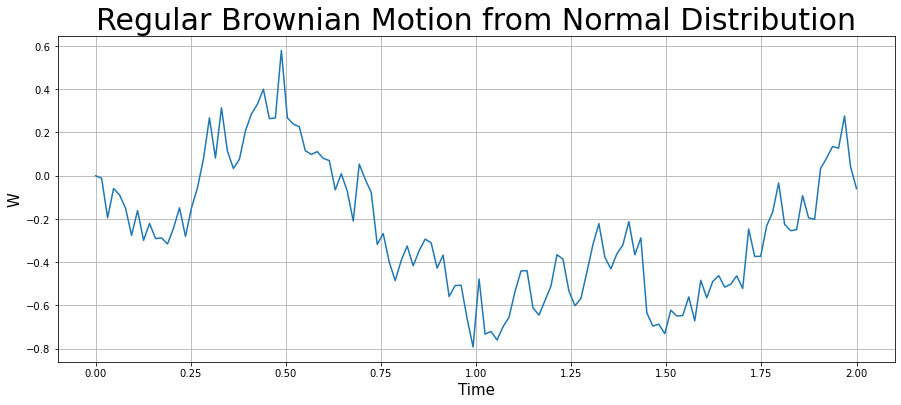

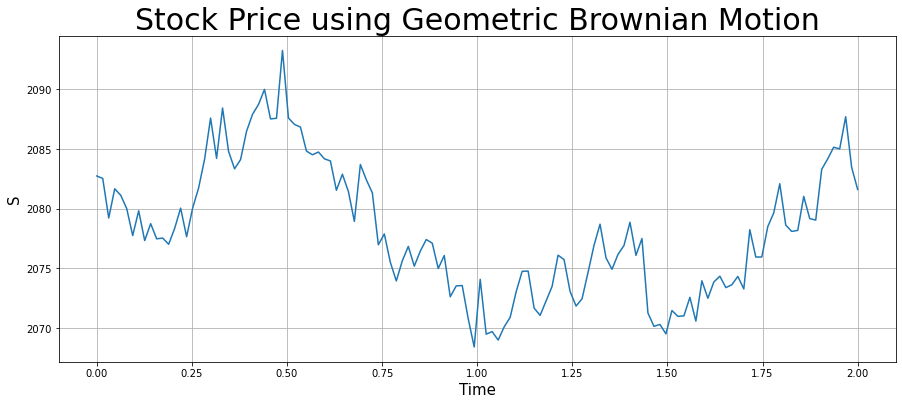

In [44]:
df = pd.read_csv('REL.csv')
df1 = df['Close Price']
plt.figure(figsize=(15, 6))
plt.plot(np.linspace(0,2,df1.size),df1)
plt.title('Original Stock Price using Data', fontsize=30)
plt.ylabel('W', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.grid()
plt.show()
s0 = df1[0]
df1 = np.array(df1)
df2 = np.zeros(df1.size-1)
summ = 0
for i in range(df1.size-1):
    df2[i] = (df1[i+1]-df1[i])/df1[i]
mu = df2.mean()
df3 = np.zeros(df1.size-1)
for i in range(1,df3.size+1):
    df3[i-1] = np.log(df1[i]/df1[i-1])
mean = df3.mean()
s = 0;
for i in range(df3.size):
    s = s + (df3[i] - mean)*(df3[i] - mean)
s = s / (df3.size - 1)
s = math.sqrt(s)
sigma = s / math.sqrt(df1.size/366)
geoBrownStock(s0,mu,sigma,2,64,22)